In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [14]:
data = []
labels = []
classes = 43
cur_path = "../input/traffic-signs-classification/myData"
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [15]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)


(73139, 32, 32, 3) (73139,)
(58511, 32, 32, 3) (14628, 32, 32, 3) (58511,) (14628,)


In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_t1, y_t1, batch_size=32, epochs=10, validation_data=(X_t2, y_t2))

Epoch 1/10
1829/1829 [==============================] - 9s 4ms/step - loss: 1.5545 - accuracy: 0.5785 - val_loss: 0.3528 - val_accuracy: 0.9051
Epoch 2/10
1829/1829 [==============================] - 7s 4ms/step - loss: 0.6963 - accuracy: 0.7855 - val_loss: 0.3113 - val_accuracy: 0.9065
Epoch 3/10
1829/1829 [==============================] - 8s 4ms/step - loss: 0.5547 - accuracy: 0.8294 - val_loss: 0.1910 - val_accuracy: 0.9482
Epoch 4/10
1829/1829 [==============================] - 8s 4ms/step - loss: 0.4700 - accuracy: 0.8559 - val_loss: 0.1310 - val_accuracy: 0.9604
Epoch 5/10
1829/1829 [==============================] - 8s 4ms/step - loss: 0.4330 - accuracy: 0.8667 - val_loss: 0.1466 - val_accuracy: 0.9547
Epoch 6/10
1829/1829 [==============================] - 7s 4ms/step - loss: 0.4049 - accuracy: 0.8744 - val_loss: 0.0984 - val_accuracy: 0.9731
Epoch 7/10
1829/1829 [==============================] - 7s 4ms/step - loss: 0.3834 - accuracy: 0.8811 - val_loss: 0.1362 - val_accuracy:

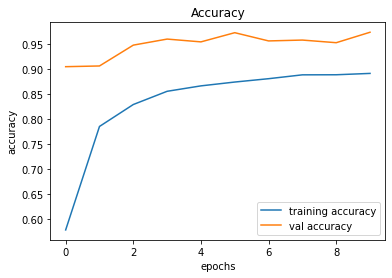

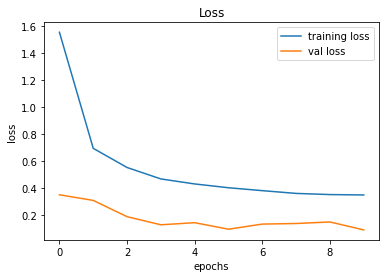

In [24]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [25]:
y_pred=model.predict(X_t2)

pred_class=np.argmax(y_pred,axis=1)
pred_class

array([10,  8, 25, ...,  4,  3, 23])

In [26]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_t2,pred_class)

Text(0.5, 1.0, 'Confusion Matrix')

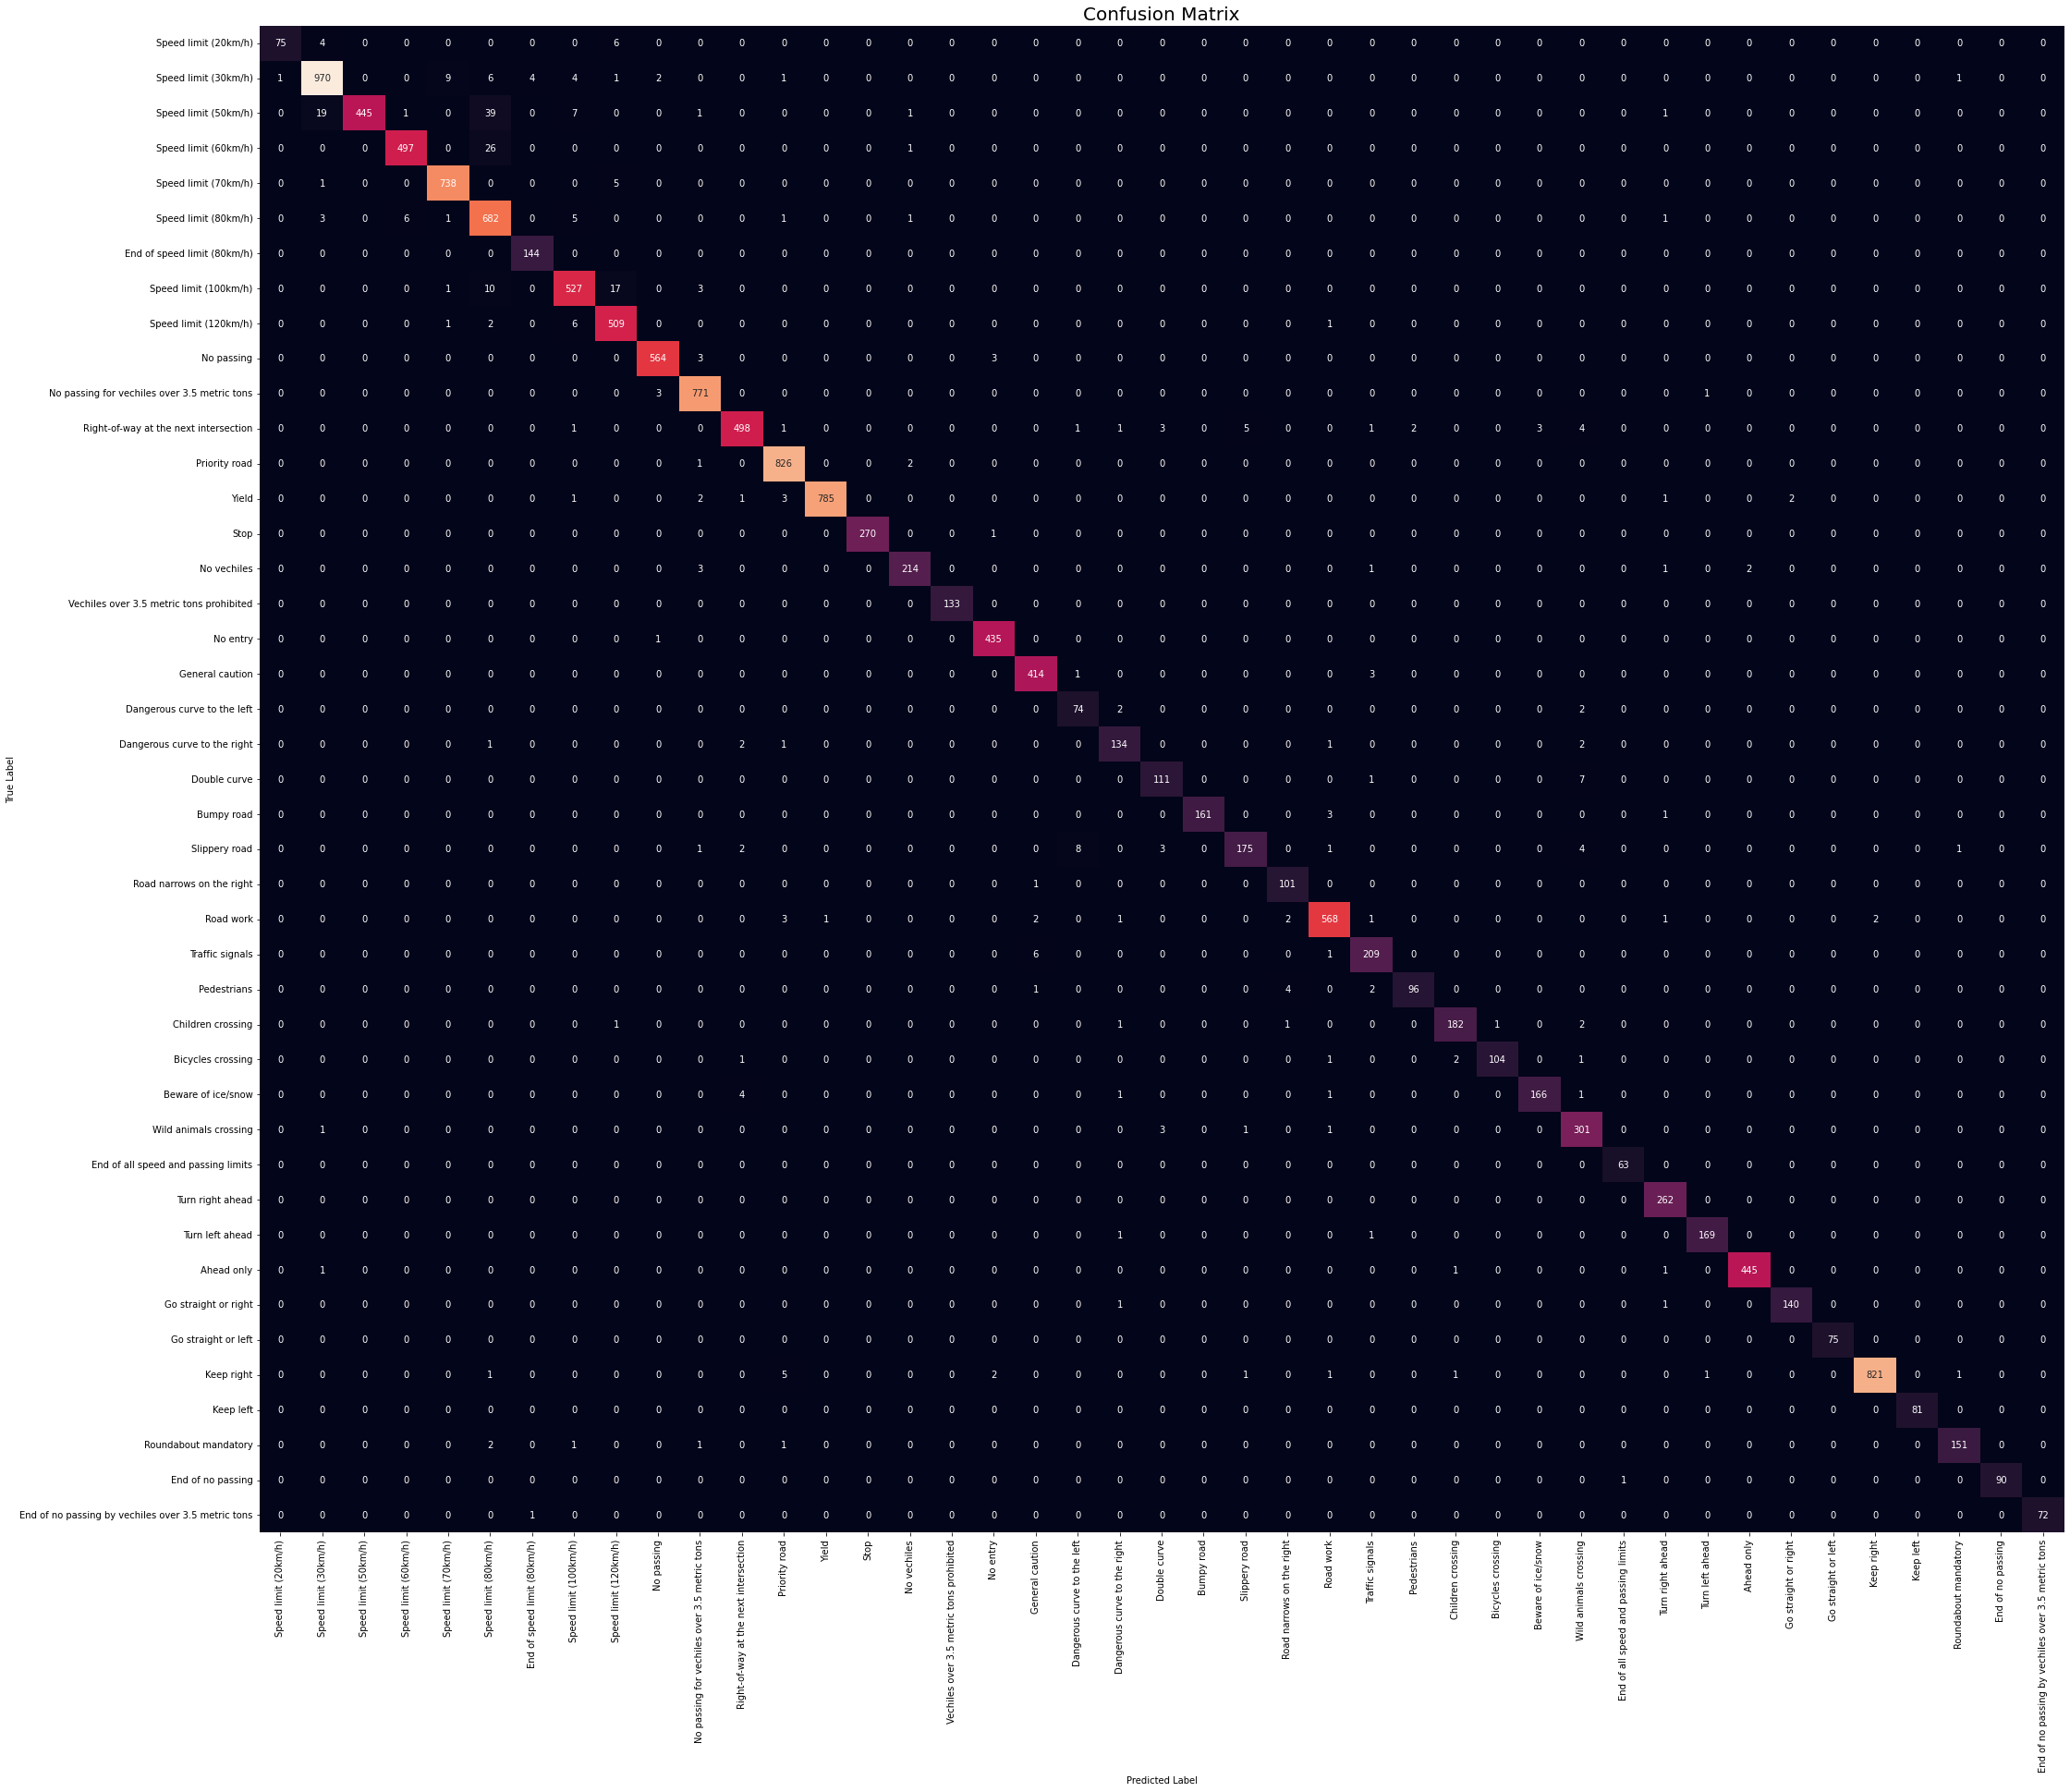

In [31]:
import seaborn as sns

labels=pd.read_csv("../input/traffic-signs-classification/labels.csv")

plt.subplots(figsize=(35,30)) 
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels["Name"],yticklabels=labels["Name"],cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=20)

In [30]:
model.save("model-32x32.h5")